In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%autosave 0
    
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

import os
import sys
import numpy as np
import pandas as pd
import sdata
import uuid
import time
import copy

#lets find databe.py
modulepath = os.path.dirname(os.getcwd())
sys.path.insert(0, os.path.abspath(os.path.join(modulepath)))

from simple_graph_db import Database

Autosave disabled


08:12:48 DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


## initialize db

In [2]:

db_file = "/tmp/simple_graph_db_example.sqlite"
if os.path.exists(db_file):
    os.remove(db_file)

db = Database(db_file=db_file)
print(db)

(DB:'/tmp/simple_graph_db_example.sqlite')


## add nodes

In [3]:
uid = db.add_node(identifier='3b883289746f496f808d1442e7d954dd', data={"answer":41})
db.find_node(uid)

{'answer': 41, 'id': '3b883289746f496f808d1442e7d954dd'}

In [4]:
try:
    uid = db.add_node(identifier='3b883289746f496f808d1442e7d954dd', data={"answer":42})
except Exception as exp:
    print(exp.__class__.__name__, exp)

08:12:48 ERROR:UNIQUE constraint failed: nodes.id


SimpleGraphException nodes.id '3b883289746f496f808d1442e7d954dd' already in use. Try db.upsert_node()!


In [5]:
db.find_node(uid)

{'answer': 41, 'id': '3b883289746f496f808d1442e7d954dd'}

In [6]:
uid = db.upsert_node(identifier='3b883289746f496f808d1442e7d954dd', data={"answer":42, "doit":"yes"})
db.find_node(uid)

{'answer': 42, 'id': '3b883289746f496f808d1442e7d954dd', 'doit': 'yes'}

## get node by uuid

In [7]:
uid1 = "e59e12cca729483f969ad1feb1b1d17e"
db.add_node(data={"a":1}, identifier=uid1)
ruid = db.find_node(uid1)
print(ruid)
assert ruid.get("id") == uid1

{'a': 1, 'id': 'e59e12cca729483f969ad1feb1b1d17e'}


In [8]:
uid2 = "afeeb876a7524c9f8f86af73e95f3785"
db.add_node(data={"b": "2"}, identifier=uid2)
ruid2 = db.find_node(uid2)
print(ruid2)
assert ruid2.get("b") == "2"

{'b': '2', 'id': 'afeeb876a7524c9f8f86af73e95f3785'}


## add edges

In [9]:
db.connect_nodes(uid1, uid2, {'con': True})
db.connect_nodes(uid2, uid, {'con': True})

## get all nodes

In [10]:
db.find_nodes({'a': ''})

[{'a': 1, 'id': 'e59e12cca729483f969ad1feb1b1d17e'}]

In [11]:
db.find_nodes({'id': 'af'})

[{'b': '2', 'id': 'afeeb876a7524c9f8f86af73e95f3785'}]

In [12]:
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

! digraph {
"3b883289746f496f808d1442e7d954dd" [label="answer 42\ndoit yes"];
"e59e12cca729483f969ad1feb1b1d17e" [label="a 1"];
"afeeb876a7524c9f8f86af73e95f3785" [label="b 2"];
}



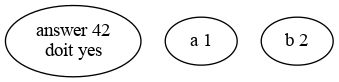

In [13]:
dotstr = db.get_dot(path=[uid, uid1, uid2])
print("!", dotstr)
draw(dotstr)

In [14]:
db.find_neighbors(uid)

[('afeeb876a7524c9f8f86af73e95f3785',
  '3b883289746f496f808d1442e7d954dd',
  '{"con":true}')]

In [15]:
db.find_neighbors(uid1)

[('e59e12cca729483f969ad1feb1b1d17e',
  'afeeb876a7524c9f8f86af73e95f3785',
  '{"con":true}')]

In [17]:
db.remove_node(uid)

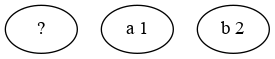

In [18]:
dotstr = db.get_dot(path=[uid, uid1, uid2])
draw(dotstr)